In [6]:
#Importing the basic librarires

import os
import math
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
from IPython.display import display

#from brokenaxes import brokenaxes
from statsmodels.formula import api
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,6]

import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv("Housing.csv")
print(df.shape)
df.head()


(545, 13)


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Copy the original data
data = df.copy()

# Encode all categorical columns
categorical_cols = data.select_dtypes(include='object').columns
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

data.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


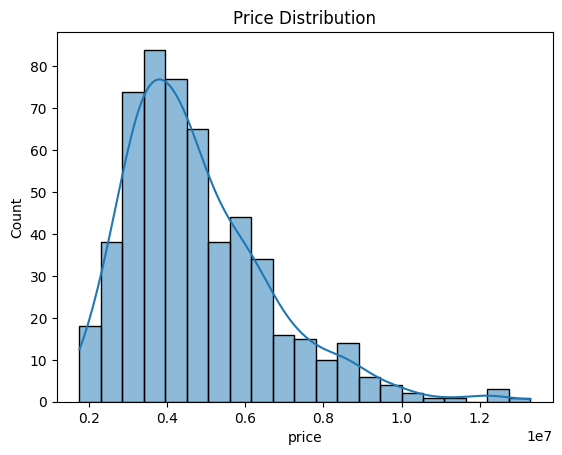

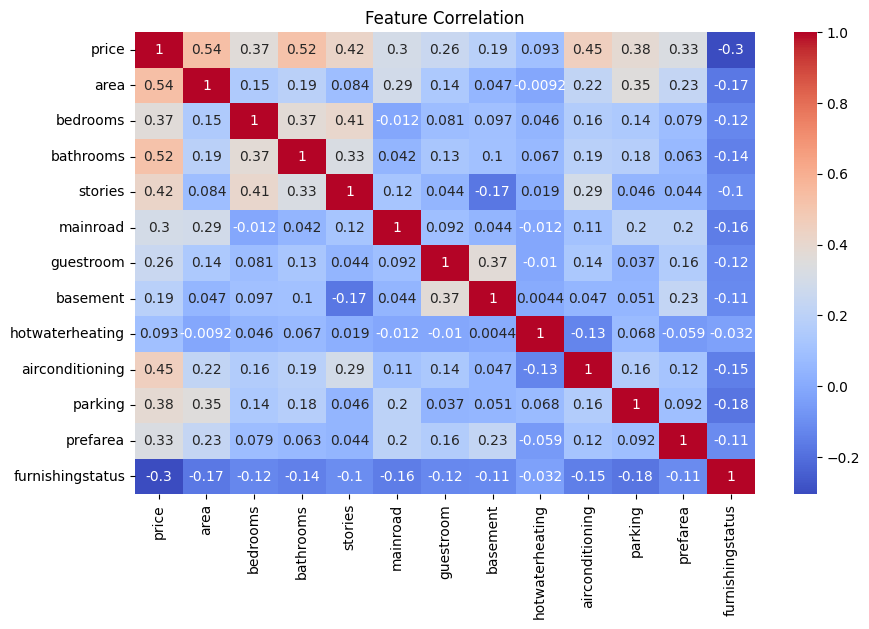

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Price distribution
sns.histplot(data['price'], kde=True)
plt.title("Price Distribution")
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation")
plt.show()


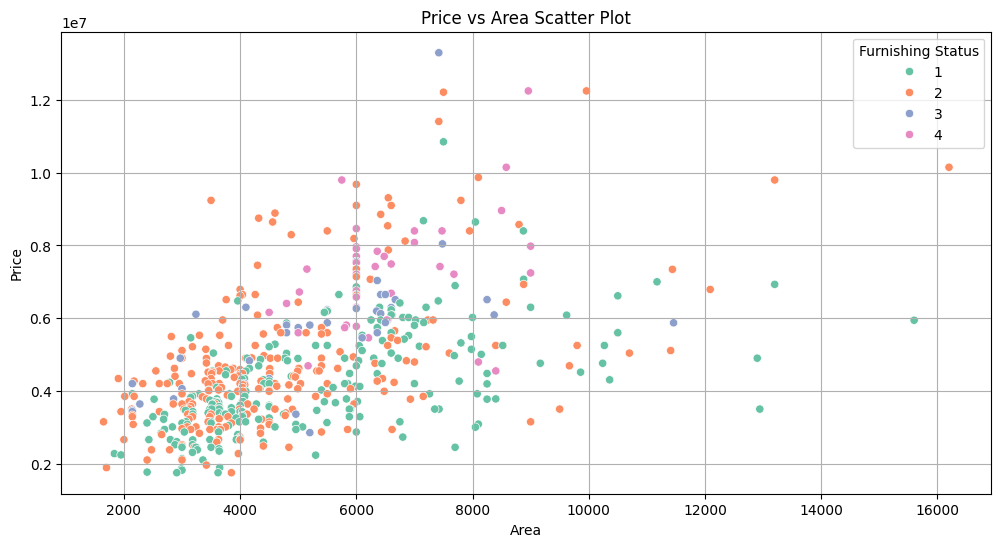

In [7]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='area', y='price', hue='stories', data=df,palette="Set2")
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Price vs Area Scatter Plot')
plt.legend(title='Furnishing Status')
plt.grid(True)
plt.show()

<Figure size 1200x600 with 0 Axes>

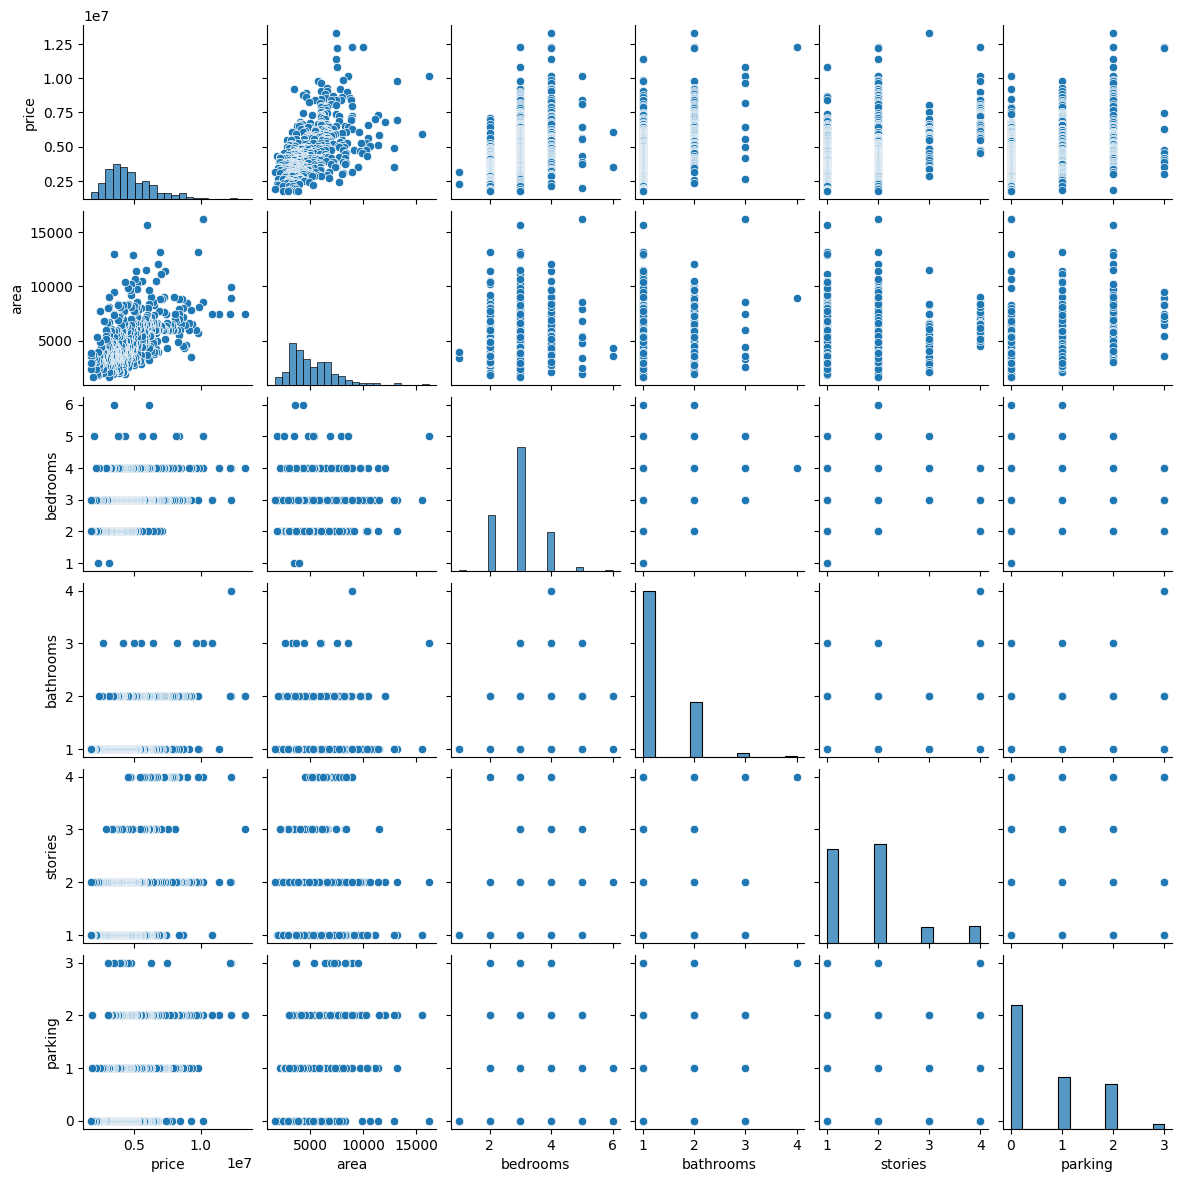

In [12]:
plt.figure(figsize=(12,6))
sns.pairplot(df, diag_kind="hist", height=2)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop("price", axis=1)
y = data["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    results[name] = {"R2 Score": r2, "MAE": mae, "RMSE": rmse}
    print(f"\n📌 {name}")
    print(f"R2 Score: {r2:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")



📌 Linear Regression
R2 Score: 0.65
MAE: 979679.69
RMSE: 1331071.42

📌 Decision Tree
R2 Score: 0.35
MAE: 1298371.56
RMSE: 1817249.95

📌 Random Forest
R2 Score: 0.61
MAE: 1025289.68
RMSE: 1401263.08


In [ ]:
import joblib

best_model = RandomForestRegressor(n_estimators=100, random_state=42)
best_model.fit(X, y)

joblib.dump(best_model, 'best_model.pkl')


['best_model.pkl']

In [ ]:
import pandas as pd
import joblib

# Load model and label encoders
model = joblib.load("best_model.pkl")

# You must keep the same encoders used during training
from sklearn.preprocessing import LabelEncoder

# Recreate the encoders manually or save/load them in real usage
label_encoders = {
    "mainroad": LabelEncoder().fit(["no", "yes"]),
    "guestroom": LabelEncoder().fit(["no", "yes"]),
    "basement": LabelEncoder().fit(["no", "yes"]),
    "hotwaterheating": LabelEncoder().fit(["no", "yes"]),
    "airconditioning": LabelEncoder().fit(["no", "yes"]),
    "prefarea": LabelEncoder().fit(["no", "yes"]),
    "furnishingstatus": LabelEncoder().fit(["furnished", "semi-furnished", "unfurnished"])
}

# Get user input
def get_input():
    print("📥 Enter House Details:")
    area = int(input("Area (in sq ft): "))
    bedrooms = int(input("Number of bedrooms: "))
    bathrooms = int(input("Number of bathrooms: "))
    stories = int(input("Number of stories: "))
    mainroad = label_encoders["mainroad"].transform([input("Main road access? (yes/no): ").strip().lower()])[0]
    guestroom = label_encoders["guestroom"].transform([input("Guest room? (yes/no): ").strip().lower()])[0]
    basement = label_encoders["basement"].transform([input("Basement? (yes/no): ").strip().lower()])[0]
    hotwaterheating = label_encoders["hotwaterheating"].transform([input("Hot water heating? (yes/no): ").strip().lower()])[0]
    airconditioning = label_encoders["airconditioning"].transform([input("Air conditioning? (yes/no): ").strip().lower()])[0]
    parking = int(input("Parking (number of cars): "))
    prefarea = label_encoders["prefarea"].transform([input("Preferred area? (yes/no): ").strip().lower()])[0]
    furnishingstatus = label_encoders["furnishingstatus"].transform([input("Furnishing status? (furnished / semi-furnished / unfurnished): ").strip().lower()])[0]

    input_data = pd.DataFrame([[
        area, bedrooms, bathrooms, stories, mainroad, guestroom, basement,
        hotwaterheating, airconditioning, parking, prefarea, furnishingstatus
    ]], columns=[
        'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
        'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus'
    ])

    return input_data

# Predict and display result
user_df = get_input()
prediction = model.predict(user_df)[0]
print(f"\n🏡 Estimated House Price: ₹{int(prediction):,}")


📥 Enter House Details:
Area (in sq ft): 5500
Number of bedrooms: 3
Number of bathrooms: 2
Number of stories: 2
Main road access? (yes/no): yes
Guest room? (yes/no): no
Basement? (yes/no): yes
Hot water heating? (yes/no): no
Air conditioning? (yes/no): yes
Parking (number of cars): 2
Preferred area? (yes/no): yes
Furnishing status? (furnished / semi-furnished / unfurnished): semi-furnished

🏡 Estimated House Price: ₹7,920,039
